Look into the following:
- How many have a significant GI score?
- What is the distribution of variance in DMF?
- Correlations between features for gene pairs:
    - Overall correlation
    - For gene pairs grown at different temperatures
- How many gene pairs have pathway information
- Check that A-B and B-A are not in the data_av dataset

SGA_pwys_fitness was generated when Sophie was here. This may or may not be correct. Gene pairs with missing pathway info were dropped, thus why there are only 258,400 gene pairs.

In [1]:
import pandas as pd

chunks = []
path = '~/yeast-co-function-prediction/Data/Costanzo_2016/S1/SGA_pwys_fitness.csv'
for chunk in pd.read_csv(path, chunksize=10 ** 6):
    chunks.append(chunk)

data_pwy = pd.concat(chunks, axis=0)
data_pwy

,Index,Query Gene,Array Gene,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Query Pathway,Array Pathway,Co-Function
0,0,YPR060C,YIL002C,0.96900,0.96900,0.92825,ALL-CHORISMATE-YEAST-PWY // PHESYN // TYRSYN,PWY3O-242,0
1,1,YPR062W,YIL002C,1.02435,1.02435,1.04670,PWY-7195 // PWY-7194,PWY3O-242,0
2,2,YPR066W,YIL002C,0.93985,0.93985,0.89765,PWY-7899,PWY3O-242,0
3,3,YPR069C,YIL002C,0.88175,0.88175,0.77430,BSUBPOLYAMSYN-PWY,PWY3O-242,0
4,4,YPR074C,YIL002C,0.96085,0.96085,0.93375,PENTOSE-P-PWY // NONOXIPENT-PWY,PWY3O-242,0
...,...,...,...,...,...,...,...,...,...
258395,258395,YNR030W,YBR097W,0.23500,1.04950,0.22500,MANNOSYL-CHITO-DOLICHOL-BIOSYNTHESIS,PWY3O-242 // PWY-6352,0
258396,258396,YMR202W,YBR097W,0.23500,0.75900,0.17620,ERGOSTEROL-SYN-PWY // PWY-6075,PWY3O-242 // PWY-6352,0
258397,258397,YMR205C,YBR097W,0.23500,0.78850,0.17700,GLYCOLYSIS-YEAST-PWY // ANAGLYCOLYSIS-PWY,PWY3O-242 // PWY-6352,0
258398,258398,YBR097W,YMR207C,0.23500,0.84750,0.18990,PWY3O-242 // PWY-6352,PWY-5966-1 // PWY66-429 // PWY0-1264,0


### EDA of the entire SGA dataset
SGA_all.csv was created by combining the data in ICER hpcc /mnt/home/seguraab/Shiu_Lab/Co-function/Data/Costanzo_2016/S1:
- SGA_ExE.txt
- SGA_ExN_NxE.txt
- SGA_NxN.txt
  
Genetic interactions involving DAmP alleles of essential genes were excluded.

In [2]:
import pandas as pd

chunks = []
path = '../yeast_data/SGA_all.csv'
for chunk in pd.read_csv(path, chunksize=10 ** 6):
    chunks.append(chunk)

data = pd.concat(chunks, axis=0)
del chunks
data

,Query Strain ID,Query allele name,Array Strain ID,Array allele name,Arraytype/Temp,Genetic interaction score (ε),P-value,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Double mutant fitness standard deviation,Type
0,YAL001C_tsq508,tfc3-g349e,YBL023C_tsa111,mcm2-1,TSA30,-0.0348,0.005042,0.8285,0.9254,0.7319,0.0102,ExE
1,YAL001C_tsq508,tfc3-g349e,YBL026W_tsa1065,lsm2-5001,TSA30,-0.3529,0.000004,0.8285,0.9408,0.4266,0.0790,ExE
2,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa274,stu1-5,TSA30,0.0126,0.462500,0.8285,0.8925,0.7520,0.1338,ExE
3,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa454,stu1-8,TSA30,0.0043,0.499800,0.8285,0.7988,0.6661,0.0831,ExE
4,YAL001C_tsq508,tfc3-g349e,YBL034C_tsa643,stu1-6,TSA30,-0.1601,0.051400,0.8285,0.7683,0.4764,0.1395,ExE
...,...,...,...,...,...,...,...,...,...,...,...,...
19313649,YPR201W_sn2211,arr3,YPL264C_dma5012,ypl264c,DMA30,0.0453,0.178600,0.9995,0.9768,1.0217,0.0405,NxN
19313650,YPR201W_sn2211,arr3,YPL265W_dma5011,dip5,DMA30,-0.0020,0.463700,0.9995,1.0230,1.0205,0.0143,NxN
19313651,YPR201W_sn2211,arr3,YPL267W_dma5010,acm1,DMA30,-0.0539,0.107200,0.9995,0.9990,0.9446,0.0331,NxN
19313652,YPR201W_sn2211,arr3,YPL272C_dma5007,pbi1,DMA30,-0.0137,0.385300,0.9995,1.0155,1.0013,0.0385,NxN


#### Note 10/16/2024
What are these DMA30 samples? I have to consider the temperature at which the samples were grown because it may result in different interactions. Thus, I may need to regenerate data_av.

In [3]:
print(data['Arraytype/Temp'].value_counts())
print(data['Type'].value_counts())

Arraytype/Temp
DMA30    13858893
DMA26     2937915
TSA26     2493350
TSA30       23496
Name: count, dtype: int64
Type
NxN    12698939
ExN     5796145
ExE      818570
Name: count, dtype: int64


#### Number of significant genetic interactions

In [4]:
# Stringent criteria
strict = data.loc[(data['P-value'] < 0.05) & \
         (data['Genetic interaction score (ε)'] > 0.16) | \
         (data['Genetic interaction score (ε)'] < -0.12),:] # (486311, 12)

# Loose criteria
loose = data.loc[(data['P-value'] < 0.05) & \
         (data['Genetic interaction score (ε)'] > 0.08) | \
         (data['Genetic interaction score (ε)'] < -0.08),:] # (1277188, 12)

print(strict.shape, loose.shape)

(486311, 12) (1277188, 12)


In [5]:
print(strict['Arraytype/Temp'].value_counts())
print(strict['Type'].value_counts())
print(loose['Arraytype/Temp'].value_counts())
print(loose['Type'].value_counts())

Arraytype/Temp
DMA30    245487
TSA26    147926
DMA26     91029
TSA30      1869
Name: count, dtype: int64
Type
NxN    214803
ExN    202397
ExE     69111
Name: count, dtype: int64
Arraytype/Temp
DMA30    705363
TSA26    332780
DMA26    235045
TSA30      4000
Name: count, dtype: int64
Type
NxN    622924
ExN    508439
ExE    145825
Name: count, dtype: int64


#### Distribution of DMF -- assess the data quality

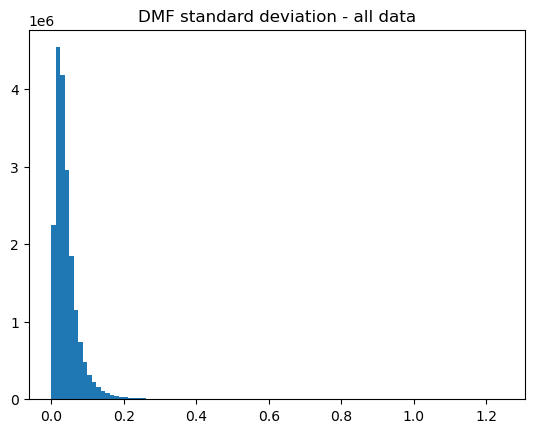

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(data['Double mutant fitness standard deviation'], bins=100)
plt.title('DMF standard deviation - all data')
plt.show()

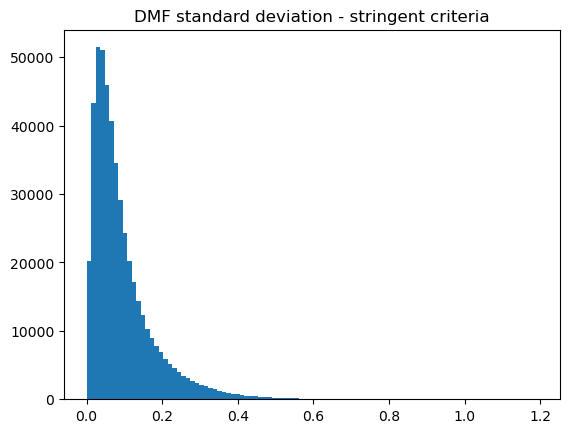

In [7]:
fig2 = plt.figure()
plt.hist(strict['Double mutant fitness standard deviation'], bins=100)
plt.title('DMF standard deviation - stringent criteria')
plt.show()

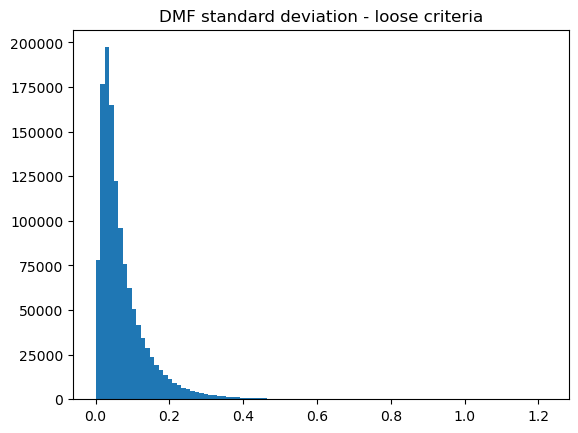

In [8]:
fig3 = plt.figure()
plt.hist(loose['Double mutant fitness standard deviation'], bins=100)
plt.title('DMF standard deviation - loose criteria')
plt.show()

#### Fitness correlations

In [9]:
data[['Query single mutant fitness (SMF)', 'Array SMF', 'Double mutant fitness']].corr()

,Query single mutant fitness (SMF),Array SMF,Double mutant fitness
Query single mutant fitness (SMF),1.000000,0.006198,0.817309
Array SMF,0.006198,1.000000,0.528688
Double mutant fitness,0.817309,0.528688,1.000000


In [10]:
strict[['Query single mutant fitness (SMF)', 'Array SMF', 'Double mutant fitness']].corr()

,Query single mutant fitness (SMF),Array SMF,Double mutant fitness
Query single mutant fitness (SMF),1.000000,-0.010391,0.501743
Array SMF,-0.010391,1.000000,0.551396
Double mutant fitness,0.501743,0.551396,1.000000


In [11]:
loose[['Query single mutant fitness (SMF)', 'Array SMF', 'Double mutant fitness']].corr()

,Query single mutant fitness (SMF),Array SMF,Double mutant fitness
Query single mutant fitness (SMF),1.000000,0.000086,0.536578
Array SMF,0.000086,1.000000,0.596132
Double mutant fitness,0.536578,0.596132,1.000000


#### Pathway information

### EDA of the pre-processed SGA dataset

In [12]:
chunks = []
path = '../yeast_data/DMF_feature_table_v20241015.tsv'
for chunk in pd.read_csv(path, chunksize=10 ** 6, sep='\t'):
    chunks.append(chunk)

data_av = pd.concat(chunks, axis=0)
del chunks
data_av

,ID,DMF,Query_SMF_new,Array_SMF_new,mean,multiplicative,additive,difference,log2_mani,pslog10_additive,pslog10_difference
0,YAL001C_YBL006C,0.648600,0.86580,0.793000,0.829400,0.686579,0.658800,0.072800,0.680337,0.146306,0.226652
1,YAL001C_YBL007C,0.742600,0.86580,0.832200,0.849000,0.720519,0.698000,0.033600,0.715244,0.153258,0.216798
2,YAL001C_YBL027W,0.646800,0.82850,0.788000,0.808250,0.652858,0.616500,0.040500,0.645042,0.139362,0.218918
3,YAL001C_YBL034C,0.522467,0.82850,0.745367,0.786933,0.617536,0.573867,0.083133,0.608598,0.132052,0.230405
4,YAL001C_YBL035C,0.558600,0.84715,0.704050,0.775600,0.596436,0.551200,0.143100,0.587454,0.127668,0.247643
...,...,...,...,...,...,...,...,...,...,...,...
11777191,YPR202W_YPR019W,0.967900,1.00950,0.925500,0.967500,0.934292,0.935000,0.084000,0.934498,0.196143,0.226454
11777192,YPR202W_YPR025C,0.964800,1.00950,0.954600,0.982050,0.963669,0.964100,0.054900,0.963797,0.201906,0.220093
11777193,YPR202W_YPR033C,0.826000,1.00950,0.887500,0.948500,0.895931,0.897000,0.122000,0.896232,0.188568,0.235313
11777194,YPR202W_YPR034W,0.468000,1.00950,0.611000,0.810250,0.616804,0.620500,0.398500,0.617567,0.131900,0.326990


In [13]:
import swifter

# Add the ID column
data.insert(0, 'Query', data['Query Strain ID'].swifter.apply(lambda x: x.split('_')[0]))
data.insert(1, 'Array', data['Array Strain ID'].swifter.apply(lambda x: x.split('_')[0]))

# reorder the values in Query_SMF and Array_SMF so that Query_SMF is always greater than Array_SMF
data['Query_new'] = data['Query'].where(data['Query single mutant fitness (SMF)'] > data['Array SMF'], data['Array'])
data['Array_new'] = data['Array'].where(data['Query single mutant fitness (SMF)'] > data['Array SMF'], data['Query'])
data['Query_SMF_new'] = data['Query single mutant fitness (SMF)'].where(data['Query single mutant fitness (SMF)'] > data['Array SMF'], data['Array SMF'])
data['Array_SMF_new'] = data['Array SMF'].where(data['Query single mutant fitness (SMF)'] > data['Array SMF'], data['Query single mutant fitness (SMF)'])
data.insert(2, 'ID', data['Query_new'] + '_' + data['Array_new'])

# Combine with the metadata
data_av = data_av.merge(data.drop(columns=['Query', 'Array', 'Query Strain ID',
    'Query allele name', 'Array Strain ID', 'Array allele name']), on='ID', how='left') # the size will increase because of the duplicates

print(data_av.ID.nunique())

/home/seguraab/miniconda3/envs/shap/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Pandas Apply: 100%|██████████| 19313654/19313654 [00:06<00:00, 2859029.92it/s]


11777196


#### Number of significant genetic interactions

In [14]:
# Stringent criteria
strict_av = data_av.loc[(data_av['P-value'] < 0.05) & \
         (data_av['Genetic interaction score (ε)'] > 0.16) | \
         (data_av['Genetic interaction score (ε)'] < -0.12),:] # (486311, 12)

# Loose criteria
loose_av = data_av.loc[(data_av['P-value'] < 0.05) & \
         (data_av['Genetic interaction score (ε)'] > 0.08) | \
         (data_av['Genetic interaction score (ε)'] < -0.08),:] # (1277188, 12)

print(strict_av.shape, loose_av.shape)

(409277, 23) (1100194, 23)


In [15]:
print(strict_av['Arraytype/Temp'].value_counts())
print(strict_av['Type'].value_counts())
print(loose_av['Arraytype/Temp'].value_counts())
print(loose_av['Type'].value_counts())

Arraytype/Temp
DMA30    215650
TSA26    127237
DMA26     64803
TSA30      1587
Name: count, dtype: int64
Type
NxN    186264
ExN    166615
ExE     56398
Name: count, dtype: int64
Arraytype/Temp
DMA30    631050
TSA26    291457
DMA26    174196
TSA30      3491
Name: count, dtype: int64
Type
NxN    550517
ExN    428785
ExE    120892
Name: count, dtype: int64


#### Distribution of DMF -- assess the data quality

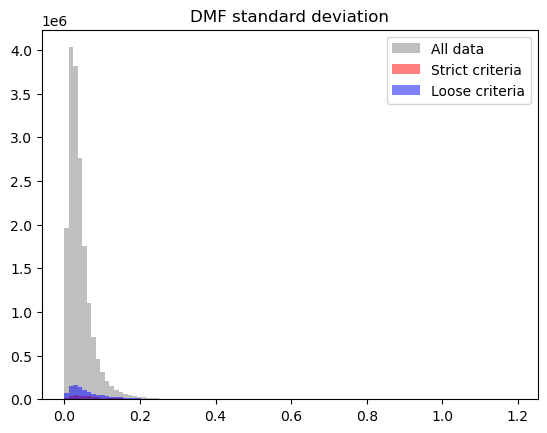

In [16]:
fig4 = plt.figure()
plt.hist(data_av['Double mutant fitness standard deviation'], bins=100, color='gray', alpha=0.5)
plt.hist(strict_av['Double mutant fitness standard deviation'], bins=100, color='red', alpha=0.5)
plt.hist(loose_av['Double mutant fitness standard deviation'], bins=100, color='blue', alpha=0.5)
plt.title('DMF standard deviation')
plt.legend(['All data', 'Strict criteria', 'Loose criteria'])
plt.show()

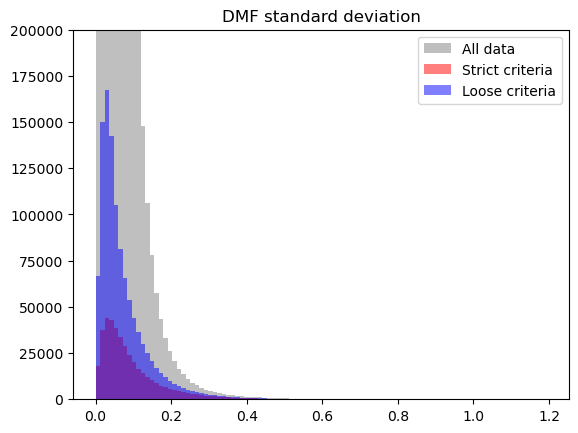

In [17]:
# limit the y axis
fig5 = plt.figure()
plt.hist(data_av['Double mutant fitness standard deviation'], bins=100, color='gray', alpha=0.5)
plt.hist(strict_av['Double mutant fitness standard deviation'], bins=100, color='red', alpha=0.5)
plt.hist(loose_av['Double mutant fitness standard deviation'], bins=100, color='blue', alpha=0.5)
plt.title('DMF standard deviation')
plt.legend(['All data', 'Strict criteria', 'Loose criteria'])
plt.ylim(0, 200000)
plt.show()

#### Fitness correlations

In [18]:
data_av[['Query single mutant fitness (SMF)', 'Array SMF', 'Double mutant fitness', 'Genetic interaction score (ε)']].corr()

,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Genetic interaction score (ε)
Query single mutant fitness (SMF),1.000000,0.006198,0.817309,-0.007906
Array SMF,0.006198,1.000000,0.516834,0.049268
Double mutant fitness,0.817309,0.516834,1.000000,0.271232
Genetic interaction score (ε),-0.007906,0.049268,0.271232,1.000000


In [19]:
strict_av[['Query single mutant fitness (SMF)', 'Array SMF', 'Double mutant fitness', 'Genetic interaction score (ε)']].corr()

,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Genetic interaction score (ε)
Query single mutant fitness (SMF),1.000000,-0.010391,0.501743,-0.064991
Array SMF,-0.010391,1.000000,0.552206,-0.059813
Double mutant fitness,0.501743,0.552206,1.000000,0.592398
Genetic interaction score (ε),-0.064991,-0.059813,0.592398,1.000000


In [20]:
loose_av[['Query single mutant fitness (SMF)', 'Array SMF', 'Double mutant fitness', 'Genetic interaction score (ε)']].corr()

,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Genetic interaction score (ε)
Query single mutant fitness (SMF),1.000000,0.000086,0.536578,-0.065084
Array SMF,0.000086,1.000000,0.590338,0.003151
Double mutant fitness,0.536578,0.590338,1.000000,0.565375
Genetic interaction score (ε),-0.065084,0.003151,0.565375,1.000000


#### Pathway information

In [22]:
# Pathway information from metaCyc
metacyc = "~/yeast-co-function-prediction/Data/MetaCyc/All-genes-pathways-S288c.txt"
pwys = pd.read_csv(metacyc, sep="\t")
pwys = pwys[["Accession-1", "Pathways of gene"]]
print(pwys.shape)
print(len(pwys['Accession-1'].unique())) # no. of unique genes, 6374
print(len(pwys['Pathways of gene'].unique())) # 374 unique pathways
print(pwys.dropna().shape) # genes with pathway info
pwys = pwys.dropna().set_index('Accession-1').to_dict()

# add gene IDs
data_av.insert(0, 'Query', data['ID'].swifter.apply(lambda x: x.split('_')[0]))
data_av.insert(1, 'Array', data['ID'].swifter.apply(lambda x: x.split('_')[1]))

# add pathway info
data_av['Query Pathway'] = data_av['Query'].map(pwys['Pathways of gene'])
data_av['Array Pathway'] = data_av['Array'].map(pwys['Pathways of gene'])

(6374, 2)
6374
374
(982, 2)


Pandas Apply: 100%|██████████| 19313654/19313654 [00:07<00:00, 2651976.62it/s]


In [23]:
data_av

,Query,Array,ID,DMF,Query_SMF_new_x,Array_SMF_new_x,mean,multiplicative,additive,difference,...,Array SMF,Double mutant fitness,Double mutant fitness standard deviation,Type,Query_new,Array_new,Query_SMF_new_y,Array_SMF_new_y,Query Pathway,Array Pathway
0,YBL023C,YAL001C,YAL001C_YBL006C,0.648600,0.8658,0.793000,0.829400,0.686579,0.658800,0.072800,...,0.8658,0.6486,0.0164,ExN,YAL001C,YBL006C,0.8658,0.7930,NaN,NaN
1,YBL026W,YAL001C,YAL001C_YBL007C,0.742600,0.8658,0.832200,0.849000,0.720519,0.698000,0.033600,...,0.8658,0.7426,0.0177,ExN,YAL001C,YBL007C,0.8658,0.8322,NaN,NaN
2,YBL034C,YAL001C,YAL001C_YBL027W,0.646800,0.8285,0.788000,0.808250,0.652858,0.616500,0.040500,...,0.7880,0.6468,0.0479,ExN,YAL001C,YBL027W,0.8285,0.7880,NaN,NaN
3,YAL001C,YBL034C,YAL001C_YBL034C,0.522467,0.8285,0.745367,0.786933,0.617536,0.573867,0.083133,...,0.7988,0.6661,0.0831,ExE,YAL001C,YBL034C,0.8285,0.7988,NaN,NaN
4,YAL001C,YBL034C,YAL001C_YBL034C,0.522467,0.8285,0.745367,0.786933,0.617536,0.573867,0.083133,...,0.7683,0.4764,0.1395,ExE,YAL001C,YBL034C,0.8285,0.7683,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17733916,YGL084C,YOR068C,YPR202W_YPR025C,0.964800,1.0095,0.954600,0.982050,0.963669,0.964100,0.054900,...,0.9546,0.9648,0.0525,ExN,YPR202W,YPR025C,1.0095,0.9546,NaN,NaN
17733917,YGL085W,YOR068C,YPR202W_YPR033C,0.826000,1.0095,0.887500,0.948500,0.895931,0.897000,0.122000,...,0.8875,0.8260,0.0481,ExN,YPR202W,YPR033C,1.0095,0.8875,NaN,NaN
17733918,YGL086W,YOR068C,YPR202W_YPR034W,0.468000,1.0095,0.611000,0.810250,0.616804,0.620500,0.398500,...,0.6110,0.4680,0.0909,ExN,YPR202W,YPR034W,1.0095,0.6110,NaN,NaN
17733919,YGL087C,YOR068C,YPR202W_YPR055W,0.944300,1.0095,0.922150,0.965825,0.930910,0.931650,0.087350,...,0.9409,0.9935,0.0092,ExN,YPR202W,YPR055W,1.0095,0.9409,PWY-7511-1,NaN


In [24]:
data_av['Query Pathway'] =  data_av['Query Pathway'].astype(str)
data_av['Array Pathway'] =  data_av['Array Pathway'].astype(str)
data_av

,Query,Array,ID,DMF,Query_SMF_new_x,Array_SMF_new_x,mean,multiplicative,additive,difference,...,Array SMF,Double mutant fitness,Double mutant fitness standard deviation,Type,Query_new,Array_new,Query_SMF_new_y,Array_SMF_new_y,Query Pathway,Array Pathway
0,YBL023C,YAL001C,YAL001C_YBL006C,0.648600,0.8658,0.793000,0.829400,0.686579,0.658800,0.072800,...,0.8658,0.6486,0.0164,ExN,YAL001C,YBL006C,0.8658,0.7930,nan,nan
1,YBL026W,YAL001C,YAL001C_YBL007C,0.742600,0.8658,0.832200,0.849000,0.720519,0.698000,0.033600,...,0.8658,0.7426,0.0177,ExN,YAL001C,YBL007C,0.8658,0.8322,nan,nan
2,YBL034C,YAL001C,YAL001C_YBL027W,0.646800,0.8285,0.788000,0.808250,0.652858,0.616500,0.040500,...,0.7880,0.6468,0.0479,ExN,YAL001C,YBL027W,0.8285,0.7880,nan,nan
3,YAL001C,YBL034C,YAL001C_YBL034C,0.522467,0.8285,0.745367,0.786933,0.617536,0.573867,0.083133,...,0.7988,0.6661,0.0831,ExE,YAL001C,YBL034C,0.8285,0.7988,nan,nan
4,YAL001C,YBL034C,YAL001C_YBL034C,0.522467,0.8285,0.745367,0.786933,0.617536,0.573867,0.083133,...,0.7683,0.4764,0.1395,ExE,YAL001C,YBL034C,0.8285,0.7683,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17733916,YGL084C,YOR068C,YPR202W_YPR025C,0.964800,1.0095,0.954600,0.982050,0.963669,0.964100,0.054900,...,0.9546,0.9648,0.0525,ExN,YPR202W,YPR025C,1.0095,0.9546,nan,nan
17733917,YGL085W,YOR068C,YPR202W_YPR033C,0.826000,1.0095,0.887500,0.948500,0.895931,0.897000,0.122000,...,0.8875,0.8260,0.0481,ExN,YPR202W,YPR033C,1.0095,0.8875,nan,nan
17733918,YGL086W,YOR068C,YPR202W_YPR034W,0.468000,1.0095,0.611000,0.810250,0.616804,0.620500,0.398500,...,0.6110,0.4680,0.0909,ExN,YPR202W,YPR034W,1.0095,0.6110,nan,nan
17733919,YGL087C,YOR068C,YPR202W_YPR055W,0.944300,1.0095,0.922150,0.965825,0.930910,0.931650,0.087350,...,0.9409,0.9935,0.0092,ExN,YPR202W,YPR055W,1.0095,0.9409,PWY-7511-1,nan


In [25]:
import numpy as np

## Assign label to gene pairs
# 1 (co-functional): query & array pathways are the same
# 0 (not co-functional): query & array pathways differ
# split Query Pathway and check if at least one pathway is in Array Pathway

def myfunc(i):
    if (data_av.iloc[i,25] != 'nan') | (data_av.iloc[i,26] != 'nan'):
        if str(bool([pwy for pwy in data_av.iloc[i,25].split(" // ") if (pwy in data_av.iloc[i,26].split(" // "))]))=='True':
            return 1
        else:
            return 0
    else:
        return np.nan

data_av['Index'] = np.linspace(0, data_av.shape[0], data_av.shape[0], endpoint=False, dtype="int32") # reset index
data_av['Co-function'] = data_av['Index'].swifter.apply(lambda x: myfunc(x)) # if at least one pathway matches, then 1, else 0

# print(data_av["Co-Function"].values.sum()) # 5026 co-functional gene pairs, 253374 non-cofunctional gene pairs
# data_av.set_index("Index", drop=True, inplace=True)

# path = "/mnt/home/seguraab/Shiu_Lab/Co-function/Data/Costanzo_2016/S1/SGA_pwys_fitness.csv"
# data_av.to_csv(path, chunksize=1000) # feature table with co-function labels based on pathways


: 